In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

input\winequalityN.csv


In [2]:
#importing all necessory libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.metrics import accuracy_score,auc,confusion_matrix,precision_score,recall_score,roc_curve,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
wine = pd.read_csv("input/winequalityN.csv")

In [5]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [9]:
wine.dropna(inplace = True)

In [10]:
wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


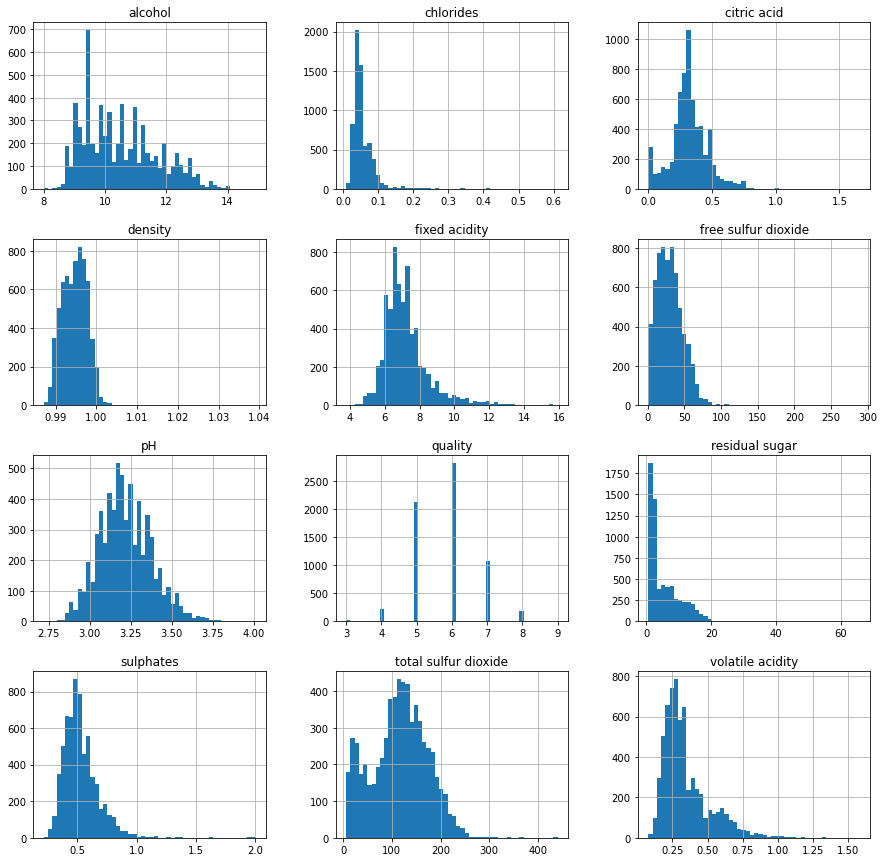

In [12]:
wine.hist(bins=50,figsize=(15,15));

In [13]:
corr_matrix = wine.corr()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.221066,0.323744,-0.113442,0.299104,-0.283485,-0.330543,0.459713,-0.251121,0.301263,-0.096190,-0.076174
volatile acidity,0.221066,1.000000,-0.377512,-0.196677,0.377995,-0.353402,-0.414729,0.272101,0.260134,0.225656,-0.039528,-0.266677
citric acid,0.323744,-0.377512,1.000000,0.142324,0.039412,0.132271,0.194398,0.097068,-0.327860,0.059070,-0.010056,0.084926
residual sugar,-0.113442,-0.196677,0.142324,1.000000,-0.128814,0.403449,0.495684,0.551494,-0.266481,-0.185616,-0.359132,-0.034654
chlorides,0.299104,0.377995,0.039412,-0.128814,1.000000,-0.195428,-0.279602,0.363108,0.044653,0.396240,-0.257664,-0.200553
free sulfur dioxide,-0.283485,-0.353402,0.132271,0.403449,-0.195428,1.000000,0.721476,0.025113,-0.145164,-0.188947,-0.179477,0.054924
total sulfur dioxide,-0.330543,-0.414729,0.194398,0.495684,-0.279602,0.721476,1.000000,0.031419,-0.237204,-0.275878,-0.264385,-0.041598
density,0.459713,0.272101,0.097068,0.551494,0.363108,0.025113,0.031419,1.000000,0.012525,0.260019,-0.687432,-0.304447
pH,-0.251121,0.260134,-0.327860,-0.266481,0.044653,-0.145164,-0.237204,0.012525,1.000000,0.190864,0.120473,0.018403
sulphates,0.301263,0.225656,0.059070,-0.185616,0.396240,-0.188947,-0.275878,0.260019,0.190864,1.000000,-0.004116,0.039054


In [14]:
X_unscaled = wine.drop("type",axis=1)
X_unscaled.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [15]:
y = wine["type"]
y

0       white
1       white
2       white
3       white
4       white
        ...  
6491      red
6492      red
6494      red
6495      red
6496      red
Name: type, Length: 6463, dtype: object

In [16]:
# one hot encoder

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
wine_cat = wine[['quality']]

In [17]:
dummy_values=cat_encoder.fit_transform(wine_cat)
dummy_values

<6463x7 sparse matrix of type '<class 'numpy.float64'>'
	with 6463 stored elements in Compressed Sparse Row format>

In [18]:
dummy_values.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
cat_encoder.categories_

[array([3, 4, 5, 6, 7, 8, 9], dtype=int64)]

In [20]:
cat_val = pd.DataFrame(dummy_values.toarray())
cat_val.head()

,0,1,2,3,4,5,6
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [21]:
cat_val.columns = ['3', '4', '5', '6', '7',"8","9"]

In [22]:
cat_val.head()

,3,4,5,6,7,8,9
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [23]:
# feature scalling

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [24]:
std_scaler.fit(X_unscaled)

StandardScaler()

In [25]:
X_unscaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [26]:
scaled_values=std_scaler.transform(X_unscaled)

In [27]:
X_scaled = pd.DataFrame(scaled_values)

In [28]:
X_scaled.columns = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]

In [29]:
X_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03
mean,7.496539e-17,-5.499667e-16,5.397130e-15,-5.625840e-16,-9.417914e-17,4.072593e-16,4.233037e-16,5.212812e-14,1.552869e-15,5.248093e-16,-3.829866e-17,3.178943e-16
std,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00
min,-2.633473e+00,-1.576837e+00,-2.194680e+00,-1.018391e+00,-1.341655e+00,-1.662225e+00,-1.940727e+00,-2.528205e+00,-3.102215e+00,-2.089628e+00,-2.089480e+00,-3.227720e+00
25%,-6.301024e-01,-6.656838e-01,-4.734030e-01,-7.661033e-01,-5.148107e-01,-7.611944e-01,-6.845873e-01,-7.889073e-01,-6.743884e-01,-6.793038e-01,-8.321839e-01,-9.373430e-01
50%,-1.677861e-01,-3.012225e-01,-6.029661e-02,-5.138161e-01,-2.582038e-01,-8.542138e-02,4.078931e-02,6.408161e-02,-5.186862e-02,-1.420373e-01,-1.616257e-01,2.078456e-01
75%,3.715830e-01,3.669567e-01,4.905119e-01,5.584045e-01,2.550099e-01,5.903516e-01,7.130896e-01,7.671311e-01,6.329031e-01,4.623876e-01,6.765720e-01,2.078456e-01
max,6.689906e+00,7.534697e+00,9.234597e+00,1.268921e+01,1.582249e+01,1.455633e+01,5.737650e+00,1.475482e+01,4.928289e+00,9.864552e+00,3.694084e+00,3.643411e+00


In [30]:
X_scaled.drop("quality",axis=1,inplace=True)

In [31]:
X_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03
mean,7.496539e-17,-5.499667e-16,5.397130e-15,-5.625840e-16,-9.417914e-17,4.072593e-16,4.233037e-16,5.212812e-14,1.552869e-15,5.248093e-16,-3.829866e-17
std,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00
min,-2.633473e+00,-1.576837e+00,-2.194680e+00,-1.018391e+00,-1.341655e+00,-1.662225e+00,-1.940727e+00,-2.528205e+00,-3.102215e+00,-2.089628e+00,-2.089480e+00
25%,-6.301024e-01,-6.656838e-01,-4.734030e-01,-7.661033e-01,-5.148107e-01,-7.611944e-01,-6.845873e-01,-7.889073e-01,-6.743884e-01,-6.793038e-01,-8.321839e-01
50%,-1.677861e-01,-3.012225e-01,-6.029661e-02,-5.138161e-01,-2.582038e-01,-8.542138e-02,4.078931e-02,6.408161e-02,-5.186862e-02,-1.420373e-01,-1.616257e-01
75%,3.715830e-01,3.669567e-01,4.905119e-01,5.584045e-01,2.550099e-01,5.903516e-01,7.130896e-01,7.671311e-01,6.329031e-01,4.623876e-01,6.765720e-01
max,6.689906e+00,7.534697e+00,9.234597e+00,1.268921e+01,1.582249e+01,1.455633e+01,5.737650e+00,1.475482e+01,4.928289e+00,9.864552e+00,3.694084e+00


In [32]:
from sklearn.pipeline import Pipeline

In [33]:
num_pipeline = Pipeline([
('std_scaler', StandardScaler()),
])
wine_num_tr = num_pipeline.fit_transform(X_unscaled)

In [34]:
wine_num_tr 

array([[-0.16778609, -0.42270958,  0.2839587 , ..., -0.5449872 ,
        -1.41892232,  0.20784562],
       [-0.70715516, -0.2404789 ,  0.14625658, ..., -0.27635393,
        -0.83218392,  0.20784562],
       [ 0.67979387, -0.36196602,  0.55936296, ..., -0.61214551,
        -0.32926528,  0.20784562],
       ...,
       [-0.70715516,  1.03513588, -1.29961576, ...,  1.46976231,
         0.42511267,  0.20784562],
       [-1.01536606,  1.85517396, -1.36846682, ...,  1.20112905,
        -0.24544551, -0.937343  ],
       [-0.93831333, -0.17973534,  1.0413204 , ...,  0.86533746,
         0.42511267,  0.20784562]])

In [35]:
wine_pipeline = pd.DataFrame(wine_num_tr)

In [36]:
wine_pipeline.columns = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]

In [37]:
wine_pipeline.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.167786,-0.422710,0.283959,3.207420,-0.315228,0.815609,0.960779,2.099926,-1.359160,-0.544987,-1.418922,0.207846
1,-0.707155,-0.240479,0.146257,-0.808151,-0.201180,-0.930138,0.288479,-0.232465,0.508399,-0.276354,-0.832184,0.207846
2,0.679794,-0.361966,0.559363,0.306117,-0.172668,-0.029107,-0.330745,0.134053,0.259391,-0.612146,-0.329265,0.207846
3,-0.013681,-0.665684,0.008554,0.642500,0.055427,0.928238,1.243853,0.300653,-0.176373,-0.880779,-0.496905,0.207846
4,-0.013681,-0.665684,0.008554,0.642500,0.055427,0.928238,1.243853,0.300653,-0.176373,-0.880779,-0.496905,0.207846


In [38]:
wine_pipeline.drop("quality",axis=1,inplace=True)
wine_pipeline.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.167786,-0.422710,0.283959,3.207420,-0.315228,0.815609,0.960779,2.099926,-1.359160,-0.544987,-1.418922
1,-0.707155,-0.240479,0.146257,-0.808151,-0.201180,-0.930138,0.288479,-0.232465,0.508399,-0.276354,-0.832184
2,0.679794,-0.361966,0.559363,0.306117,-0.172668,-0.029107,-0.330745,0.134053,0.259391,-0.612146,-0.329265
3,-0.013681,-0.665684,0.008554,0.642500,0.055427,0.928238,1.243853,0.300653,-0.176373,-0.880779,-0.496905
4,-0.013681,-0.665684,0.008554,0.642500,0.055427,0.928238,1.243853,0.300653,-0.176373,-0.880779,-0.496905


In [39]:
# column transformer

from sklearn.compose import ColumnTransformer

In [40]:
num_attribs = list(X_scaled)
print(num_attribs)
cat_attribs = ["quality"]
print(cat_attribs)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
['quality']


In [41]:
X_scaled.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [42]:
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])
wine_prepared = full_pipeline.fit_transform(X_unscaled)

In [43]:
wine_prepared = pd.DataFrame(wine_prepared)

In [44]:
wine_prepared.shape

(6463, 18)

In [45]:
wine_prepared.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.167786,-0.422710,0.283959,3.207420,-0.315228,0.815609,0.960779,2.099926,-1.359160,-0.544987,-1.418922,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.707155,-0.240479,0.146257,-0.808151,-0.201180,-0.930138,0.288479,-0.232465,0.508399,-0.276354,-0.832184,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.679794,-0.361966,0.559363,0.306117,-0.172668,-0.029107,-0.330745,0.134053,0.259391,-0.612146,-0.329265,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.013681,-0.665684,0.008554,0.642500,0.055427,0.928238,1.243853,0.300653,-0.176373,-0.880779,-0.496905,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.013681,-0.665684,0.008554,0.642500,0.055427,0.928238,1.243853,0.300653,-0.176373,-0.880779,-0.496905,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [46]:
wine_prepared.columns = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","3","4","5","6","7","8","9"]

In [47]:
wine_prepared.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,3,4,5,6,7,8,9
0,-0.167786,-0.422710,0.283959,3.207420,-0.315228,0.815609,0.960779,2.099926,-1.359160,-0.544987,-1.418922,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.707155,-0.240479,0.146257,-0.808151,-0.201180,-0.930138,0.288479,-0.232465,0.508399,-0.276354,-0.832184,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.679794,-0.361966,0.559363,0.306117,-0.172668,-0.029107,-0.330745,0.134053,0.259391,-0.612146,-0.329265,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.013681,-0.665684,0.008554,0.642500,0.055427,0.928238,1.243853,0.300653,-0.176373,-0.880779,-0.496905,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.013681,-0.665684,0.008554,0.642500,0.055427,0.928238,1.243853,0.300653,-0.176373,-0.880779,-0.496905,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [48]:
# train test split of data

X_train,X_test,y_train,y_test = train_test_split(wine_prepared,y,test_size=0.3,random_state=10,stratify=y)


In [49]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((4524, 18), (4524,), (1939, 18), (1939,))

In [50]:
model = LogisticRegression() # build model

In [51]:
model.fit(X_train,y_train)

LogisticRegression()

In [52]:
model.score(X_train,y_train)  # as we can see the model is overfitted

0.9938107869142352

In [53]:
from mlxtend.feature_selection import SequentialFeatureSelector  # so we can do sequential feayure selector by rfe


In [54]:
from sklearn.feature_selection import RFE


In [55]:
model3 = LogisticRegression()


In [56]:
rfe = RFE(estimator=model3, step=1,verbose=2)

In [57]:
rfe.fit(X_train,y_train)  

Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.


RFE(estimator=LogisticRegression(), verbose=2)

In [58]:
selected_rfe_features=pd.DataFrame({"Features":list(X_train),"Ranking":rfe.ranking_})
selected_rfe_features.sort_values(by="Ranking")

,Features,Ranking
1,volatile acidity,1
12,4,1
3,residual sugar,1
4,chlorides,1
5,free sulfur dioxide,1
6,total sulfur dioxide,1
7,density,1
10,alcohol,1
9,sulphates,1
8,pH,2


In [59]:
X_train_rfe = rfe.transform(X_train)

X_train_rfe.shape

(4524, 9)

In [60]:
model3.fit(X_train_rfe, y_train)

LogisticRegression()

In [61]:
r2_rfe = model3.score(X_train_rfe, y_train)
r2_rfe

0.9946949602122016

In [62]:
y_pred_train = model3.predict(X_train_rfe)
y_pred_train[:10]

array(['red', 'white', 'white', 'white', 'white', 'red', 'white', 'white',
       'red', 'white'], dtype=object)

In [63]:
confusion_matrix(y_train,y_pred_train)

array([[1100,   15],
       [   9, 3400]], dtype=int64)

In [64]:
summary=classification_report(y_train,y_pred_train)
print(summary)

              precision    recall  f1-score   support

         red       0.99      0.99      0.99      1115
       white       1.00      1.00      1.00      3409

    accuracy                           0.99      4524
   macro avg       0.99      0.99      0.99      4524
weighted avg       0.99      0.99      0.99      4524

